In [1]:
import tensorflow as tf
assert tf.__version__ >= "2.0"
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

AttributeError: module 'tensorflow' has no attribute '__version__'

In [2]:
# some activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

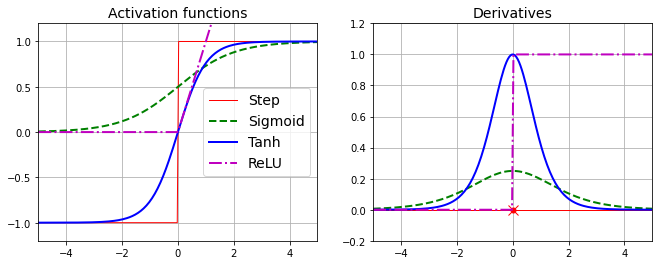

In [3]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [10]:
#loading datasets
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
#take a look to data
print(X_train_full.shape)
print(y_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
(60000,)


In [12]:
#lets divide into validation and training and divide all numbers by 255
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [13]:
#lets nomine the class names of fashion mnist
class_names =["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

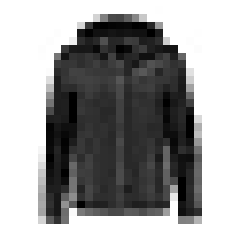

In [17]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

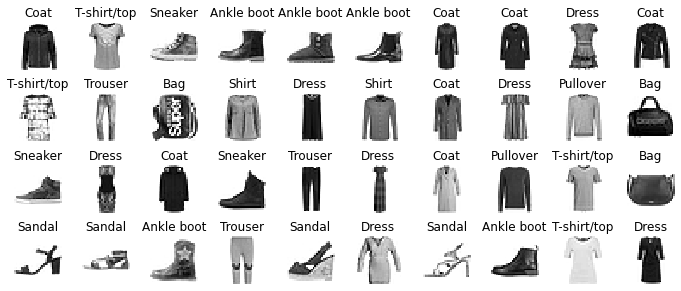

In [18]:
#sample of images in the dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [20]:
#lets build a model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [36]:
#this works fine but we can pass the model also in this way
#clear all
keras.backend.clear_session()

model = keras.models.Sequential([
                                keras.layers.Flatten(input_shape=[28,28]),
                                keras.layers.Dense(300, activation="relu"),
                                keras.layers.Dense(100, activation="relu"),
                                keras.layers.Dense(10, activation="softmax"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
#get model list of layers
print(model.layers)
hidden1 = model.layers[1]
print(hidden1.name)
print(model.get_layer('dense') is hidden1)

dense
True


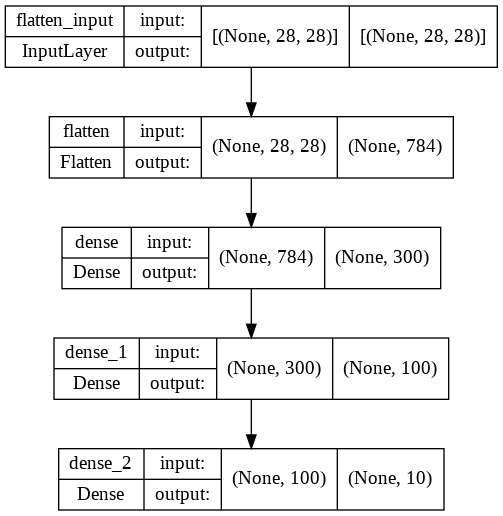

In [37]:
#printing the model
keras.utils.plot_model(model, show_shapes=True)

In [31]:
#we can access all the parameters of the layers
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[ 0.03574536 -0.02389931  0.01030421 ... -0.06151724 -0.0451347
   0.03140047]
 [-0.05467119  0.04656268 -0.07248728 ... -0.07038655 -0.03083268
  -0.06513114]
 [-0.03234808 -0.00317231  0.04102226 ... -0.03237895  0.01965773
  -0.00825518]
 ...
 [-0.0630435   0.07371157 -0.05752673 ...  0.07049479  0.05577183
  -0.02518321]
 [-0.02547856  0.07304457  0.04983643 ... -0.05780029  0.07438232
  -0.0286764 ]
 [-0.02862201  0.01245171 -0.04573321 ...  0.04891213 -0.06256616
  -0.02975626]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [38]:
#lets compile the model, we have to specify the loss function, the optimizer and the metric
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [39]:
#we are ready to fit the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7367 - accuracy: 0.7554 - val_loss: 0.5317 - val_accuracy: 0.8136
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4923 - accuracy: 0.8277 - val_loss: 0.4393 - val_accuracy: 0.8494
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4453 - accuracy: 0.8420 - val_loss: 0.5342 - val_accuracy: 0.8000
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4181 - accuracy: 0.8527 - val_loss: 0.3998 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3989 - accuracy: 0.8596 - val_loss: 0.3794 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3798 - accuracy: 0.8654 - val_loss: 0.3777 - val_accuracy: 0.8694
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3674 - accuracy: 0.8696 - val_loss: 0.3636 - val_accuracy

In [40]:
#show the params in history of training
print(history.params)
print(history.epoch)
print(history.history.keys())

{'verbose': 1, 'epochs': 30, 'steps': 1719}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


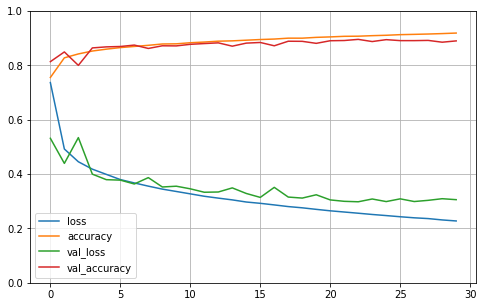

In [41]:
#plot the curves of loss and accuracy
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [42]:
#evaluate the model on the test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3389 - accuracy: 0.8808


[0.3388991057872772, 0.8808000087738037]

In [44]:
#make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))
#for each instance it estimate a probability per class

[[0.   0.   0.   0.   0.   0.01 0.   0.02 0.   0.97]
 [0.   0.   0.99 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [50]:
#you can visualize only the classes with major probability 
y_pred = np.argmax(model.predict(X_new), axis=1)
print(y_pred)
print(np.array(class_names)[y_pred])
#lets see in the targets if the prediction is True
y_new = y_test[:3]
print(y_new)
#it is

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']
[9 2 1]


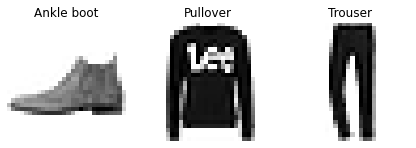

In [51]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()